In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.1.0+cu118'

# Data

In [3]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[: 10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [4]:
y[: 10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [5]:
len(X)

50

In [6]:
len(y)

50

In [7]:
train_split=int(0.8*len(X))
x_train,y_train=X[:train_split],y[: train_split]
x_test,y_test=X[train_split:],y[train_split :]

In [8]:
len(x_train),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [9]:
def plot_predict(train=x_train,
                 train_label=y_train,
                 test_data=x_test,
                 test_label=y_test,
                 predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train,train_label,color="blue",label="Train_data")
  plt.scatter(train,train_label,color="crimson",label="Test_data")

  if predictions is not None:
    plt.scatter(test_data,predictions,color="darkblue",label="prediction")

  plt.legend()



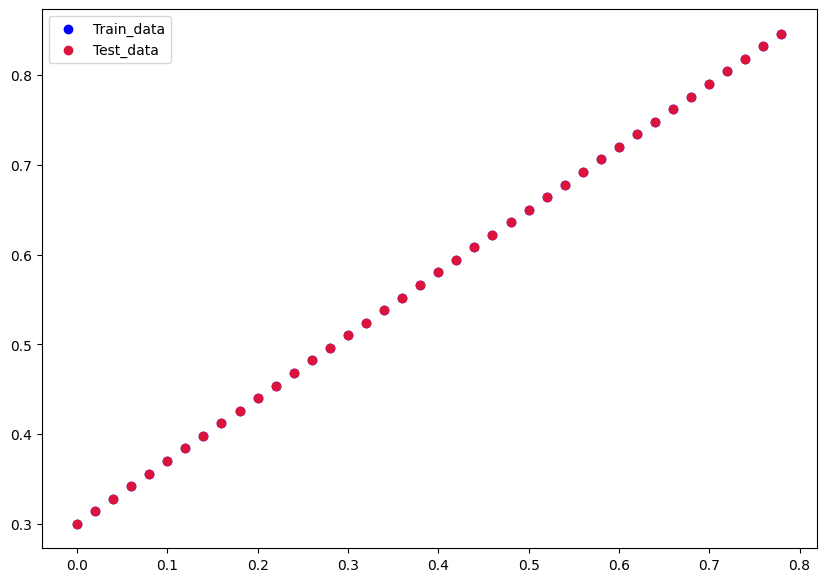

In [10]:
plot_predict()

# create Model

In [11]:
class LinearRegressionModel(nn.Module):


    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias



In [12]:
torch.manual_seed(42)
model_0=LinearRegressionModel()

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
with torch.inference_mode():
    pred = model_0(x_test)

print(pred)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


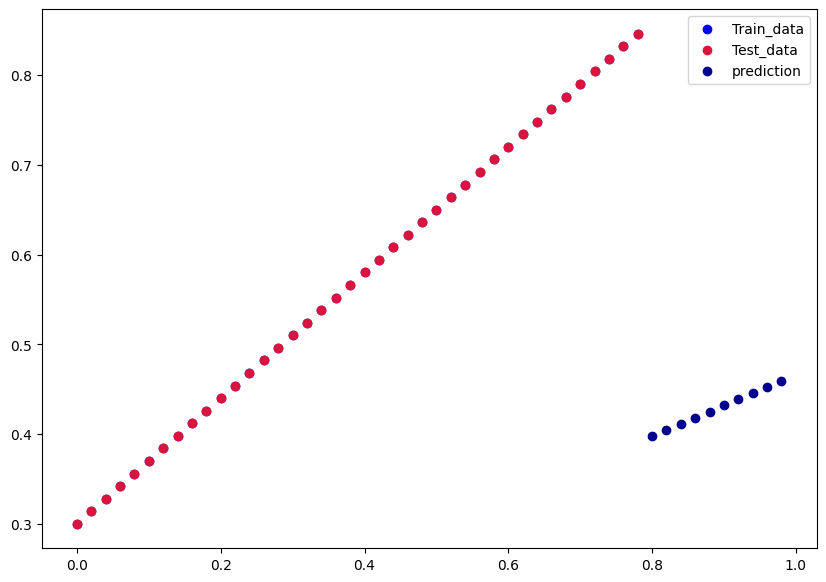

In [16]:
plot_predict(predictions=pred)

In [17]:
loss_0 = nn.L1Loss()
optimizer=torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [18]:

torch.manual_seed(42)
epochs=1000
for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(x_train)
  loss=loss_0(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

with torch.inference_mode():

  predict=model_0(x_test)
  test_loss=loss_0(predict,y_test)

if epochs%10==0:

  print(f"Epoch: {epochs} | Loss : {loss} | Test Loss {test_loss}")


Epoch: 1000 | Loss : 0.00010414719872642308 | Test Loss 0.0003022432210855186


In [19]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6999])), ('bias', tensor([0.2998]))])

In [20]:
loss

tensor(0.0001, grad_fn=<MeanBackward0>)

In [21]:
with torch.inference_mode():
  new=model_0(x_test)


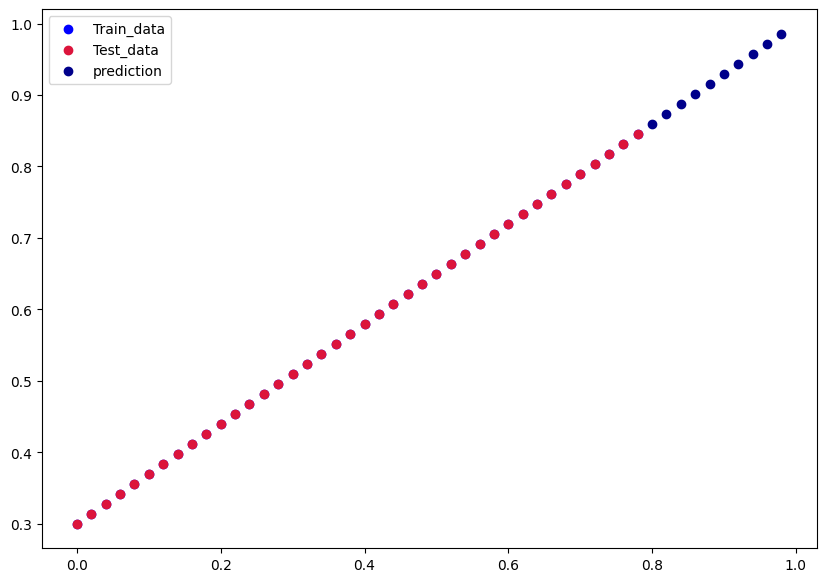

In [22]:
plot_predict(predictions=new)

In [23]:
print(weight)
print("==========================")
print(bias)

0.7
0.3


In [24]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="new_model.pth"
model_save_path=model_path/model_name
print(f"saving models to : {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

saving models to : models/new_model.pth


In [25]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1508 Nov  5 15:22 new_model.pth


In [26]:
load_model=LinearRegressionModel()
load_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [27]:
load_model.state_dict()

OrderedDict([('weight', tensor([0.6999])), ('bias', tensor([0.2998]))])

In [28]:
load_model.eval()
with torch.inference_mode():
  load_model0=load_model(x_test)
load_model0

tensor([[0.8597],
        [0.8737],
        [0.8877],
        [0.9017],
        [0.9157],
        [0.9297],
        [0.9437],
        [0.9577],
        [0.9717],
        [0.9857]])

In [29]:
y_pred

tensor([[0.3001],
        [0.3141],
        [0.3281],
        [0.3421],
        [0.3561],
        [0.3701],
        [0.3841],
        [0.3981],
        [0.4121],
        [0.4261],
        [0.4401],
        [0.4541],
        [0.4681],
        [0.4821],
        [0.4961],
        [0.5101],
        [0.5241],
        [0.5381],
        [0.5521],
        [0.5661],
        [0.5801],
        [0.5941],
        [0.6081],
        [0.6221],
        [0.6361],
        [0.6501],
        [0.6641],
        [0.6781],
        [0.6921],
        [0.7061],
        [0.7201],
        [0.7341],
        [0.7481],
        [0.7621],
        [0.7761],
        [0.7901],
        [0.8041],
        [0.8181],
        [0.8322],
        [0.8462]], grad_fn=<AddBackward0>)

# Data

In [30]:
weight=0.7
bias=0.4
start=0
end=1
step=0.02
x=torch.arange(start,end,step)
y=weight*x+bias


In [31]:
x[: 10],y[: 10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.4000, 0.4140, 0.4280, 0.4420, 0.4560, 0.4700, 0.4840, 0.4980, 0.5120,
         0.5260]))

In [32]:
train_split=int(0.8*len(x))
x_train,y_train=x[: train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split :]

In [33]:
len(x_test),len(x_train),len(y_train),len(y_test)

(10, 40, 40, 10)

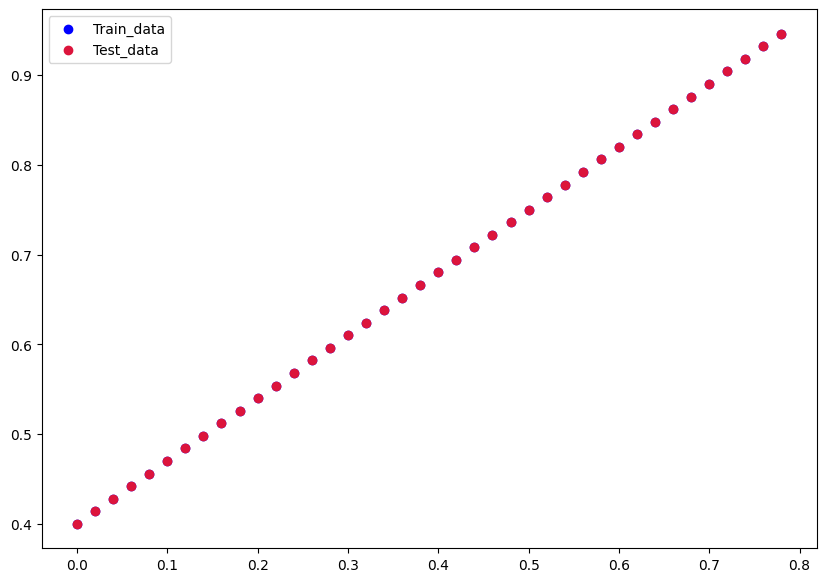

In [34]:
plot_predict(x_train,y_train,x_test,y_test)

# Create Model

In [35]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:

    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()

In [36]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [37]:
batch_size = 64  # Replace with the actual batch size
x_train = torch.randn((batch_size, 1))
x_test = torch.randn((batch_size, 1))

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

# for training we need :

**loss function**

**optimizer**

**training loop**

**testing loop**

In [39]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [40]:
torch.manual_seed(42)
epochs=100

x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(x_train)

  #calculate loss
  loss=loss_fn(y_pred,y_train)

  #optimizer zero_grad

  optimizer.zero_grad()
# perform back propagation
  loss.backward()

  #optimizer step

  optimizer.step()

  #Testing

  model_1.eval()

  with torch.inference_mode():
    test_pred=model_1(x_test)

    test_loss=loss_fn(test_pred,y_test)

    if epoch%10==0:
      print(f"Epoch : {epoch} | Loss: {loss} | Test loss : {test_loss}")


Epoch : 0 | Loss: 0.6125005483627319 | Test loss : 0.4887825548648834
Epoch : 10 | Loss: 0.554649293422699 | Test loss : 0.4389096200466156
Epoch : 20 | Loss: 0.49816542863845825 | Test loss : 0.3904222846031189
Epoch : 30 | Loss: 0.44319677352905273 | Test loss : 0.3443278670310974
Epoch : 40 | Loss: 0.3905448317527771 | Test loss : 0.30303895473480225
Epoch : 50 | Loss: 0.3407367467880249 | Test loss : 0.2707385718822479
Epoch : 60 | Loss: 0.2939513027667999 | Test loss : 0.25048500299453735
Epoch : 70 | Loss: 0.2507752776145935 | Test loss : 0.24233071506023407
Epoch : 80 | Loss: 0.2135818749666214 | Test loss : 0.24791619181632996
Epoch : 90 | Loss: 0.18465909361839294 | Test loss : 0.26430952548980713


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [41]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1149]])),
             ('linear_layer.bias', tensor([0.7210]))])

In [42]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(x_test)
y_preds

tensor([[0.9758],
        [0.7811],
        [0.7608],
        [0.6983],
        [0.5998],
        [0.8678],
        [0.7377],
        [0.7475],
        [0.7275],
        [0.7699],
        [0.7870],
        [0.6473],
        [0.4675],
        [0.6347],
        [1.0442],
        [0.7623],
        [0.5670],
        [0.6537],
        [0.7826],
        [0.7812],
        [0.8521],
        [0.7269],
        [0.8046],
        [0.6394],
        [0.6004],
        [0.7903],
        [0.5231],
        [0.6259],
        [0.8743],
        [0.7765],
        [0.6983],
        [0.8667],
        [0.8111],
        [0.7243],
        [0.7946],
        [0.7880],
        [0.8435],
        [0.6693],
        [0.6430],
        [0.7869],
        [0.7675],
        [0.7415],
        [0.7514],
        [0.8672],
        [0.7208],
        [0.6861],
        [0.6077],
        [0.7351],
        [0.6522],
        [0.7758],
        [0.8044],
        [0.7314],
        [0.6763],
        [0.7816],
        [0.8394],
        [0